<a href="https://colab.research.google.com/github/samuelkoGithub/machineLearningJourney/blob/main/Keras_Mnist_myMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
240/240 - 2s - loss: 0.4390 - accuracy: 0.8835 - val_loss: 0.2222 - val_accuracy: 0.9382 - 2s/epoch - 8ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1892 - accuracy: 0.9472 - val_loss: 0.1525 - val_accuracy: 0.9568 - 1s/epoch - 5ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1344 - accuracy: 0.9619 - val_loss: 0.1292 - val_accuracy: 0.9632 - 1s/epoch - 5ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1021 - accuracy: 0.9708 - val_loss: 0.1078 - val_accuracy: 0.9682 - 1s/epoch - 5ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0817 - accuracy: 0.9770 - val_loss: 0.1030 - val_accuracy: 0.9703 - 1s/epoch - 5ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0658 - accuracy: 0.9815 - val_loss: 0.0918 - val_accuracy: 0.9726 - 1s/epoch - 6ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0543 - accuracy: 0.9845 - val_loss: 0.0837 - val_accuracy: 0.9753 - 1s/epoch - 5ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0452 - accuracy: 0.9879 - val_loss: 0.0806 - val_accuracy: 0.9763 - 1s/epoch - 6ms/step
Epoch 9/10
240/240 - 1s 

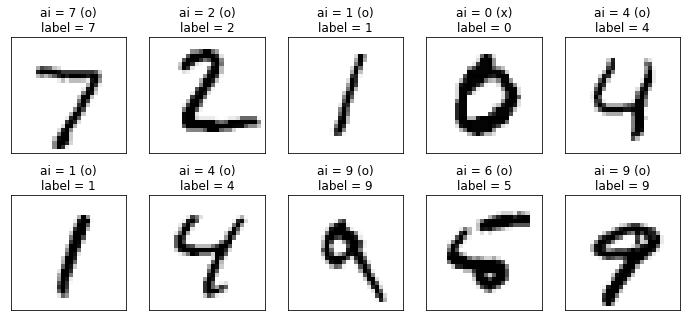

In [ ]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show() 

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
#---------------- Modified by Samuel KO - 18 March 2022 ------------------------   
       # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            #title = 'ai = ' + str(predictions[i])
            title = 'ai = '+ str(predictions[i].tolist().index(1))
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i].any() == labels[i].any() else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
     
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
#-------------------------------------------------------------------------------   
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()

#show_image(train_feature[0]) 
#show_images_labels_predictions(train_feature,train_label,[],0,10)    

#將 Features 特徵值換為 784個 float 數字的 1 維向量
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

#預測 --------------- Modified by Samuel KO on 18 March 2022 --------------------
prediction = (model.predict(test_feature_normalize) > 0.5).astype("float32")
print('\n Prediction=', prediction)
print('\n')
#預測 ---------------------------------------------------------------------------

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)